In [3]:
from explauto.experiment import Experiment, make_settings
from explauto.environment.simple_arm import SimpleArmEnvironment
from explauto.environment.simple_arm import configurations
s = make_settings(SimpleArmEnvironment(**configurations["high_dim_high_s_range"]),
                  babbling_mode='goal', 
                  interest_model='random',
                  sensorimotor_model='nearest_neighbor')

expe = Experiment.from_settings(s)

In [6]:
expe.evaluate_at([100, 200, 400, 1000], s.default_testcases)

In [7]:
expe.run()

Populating the interactive namespace from numpy and matplotlib


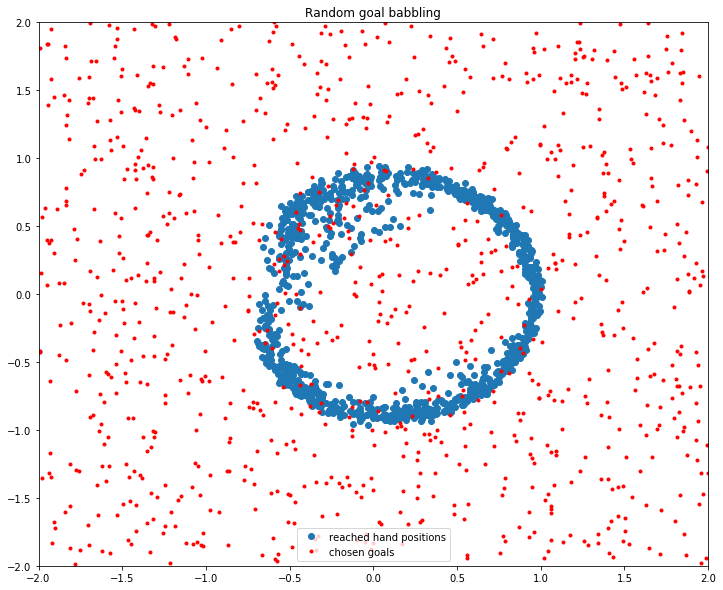

In [8]:
%pylab inline
rcParams['figure.figsize'] = (12.0, 10.0)
ax = axes()
title(('Random goal babbling'))
expe.log.scatter_plot(ax, (('sensori', [0, 1]),))
expe.log.scatter_plot(ax, (('choice', [0, 1]),), marker='.', color='red')
legend(['reached hand positions', 'chosen goals'])

In [1]:
from explauto.interest_model import interest_models
print 'Available interest models: {}'.format(interest_models.keys())

Available interest models: ['discretized_progress', 'tree', 'random', 'gmm_progress_beta', 'misc_random']


In [39]:
from explauto.experiment import ExperimentPool
from explauto.environment.simple_arm import *

xps = ExperimentPool.from_settings_product(environments=[SimpleArmEnvironment
                                                         (**configurations["high_dim_high_s_range"])],
                                           babblings=['goal'],
                                           interest_models=[('random', 'default'), ('discretized_progress', 'default'), ('tree', 'default')],
                                           sensorimotor_models=[('nearest_neighbor', 'default')],
                                           evaluate_at=[200, 300, 500, 1000, 2000, 3000, 5000,6000,7000],
                                           same_testcases=True)

Populating the interactive namespace from numpy and matplotlib


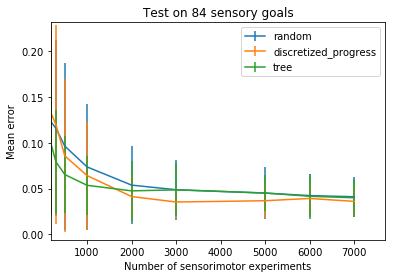

In [46]:
%pylab inline
ax=axes()
for log in xps.logs:
    log.plot_learning_curve(ax)
    
legend([s.interest_model for s in xps.settings])

Populating the interactive namespace from numpy and matplotlib


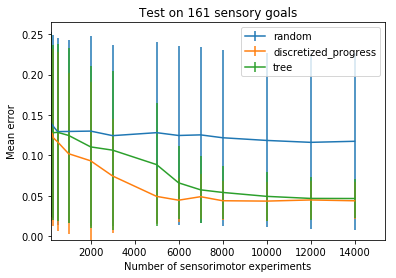

In [3]:
from explauto.experiment import ExperimentPool
from explauto.environment.simple_arm import *
config=configurations["high_dim_high_s_range"].copy()
config['s_mins']=array([-10.,-10.])
config['s_maxs']=array([10.,10.])
xps = ExperimentPool.from_settings_product(environments=[SimpleArmEnvironment(**config)],
                                           babblings=['goal'],
                                           interest_models=[('random', 'default'), ('discretized_progress', 'default'), ('tree', 'default')],
                                           sensorimotor_models=[('nearest_neighbor', 'default')],
                                           # evaluate_at=[200, 300, 500],
                                           evaluate_at=[200, 300, 500, 1000, 2000, 3000, 5000,6000,7000,8000,10000,12000,14000],
                                           same_testcases=True)
logs = xps.run()
%pylab inline
ax=axes()
for log in xps.logs:
    log.plot_learning_curve(ax)
    
legend([s.interest_model for s in xps.settings])

Populating the interactive namespace from numpy and matplotlib


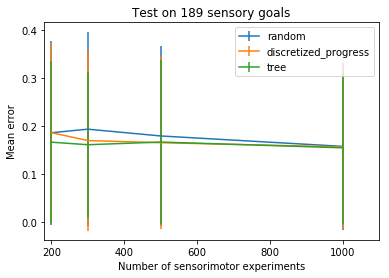

In [10]:
from explauto.experiment import ExperimentPool
from explauto.environment.simple_arm import *
config=configurations["mid_dimensional"].copy()
config['s_mins']=array([-0.5,0.])
config['s_maxs']=array([1.,1.])
xps = ExperimentPool.from_settings_product(environments=[SimpleArmEnvironment(**config)],
                                           babblings=['motor'],
                                           interest_models=[('random', 'default'), ('discretized_progress', 'default'), ('tree', 'default')],
                                           sensorimotor_models=[('nearest_neighbor', 'default')],
                                           # evaluate_at=[200, 300, 500],
                                           evaluate_at=[200, 300, 500,1000],
                                           same_testcases=True)
logs = xps.run()
%pylab inline
ax=axes()
for log in xps.logs:
    log.plot_learning_curve(ax)
    
legend([s.interest_model for s in xps.settings])

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


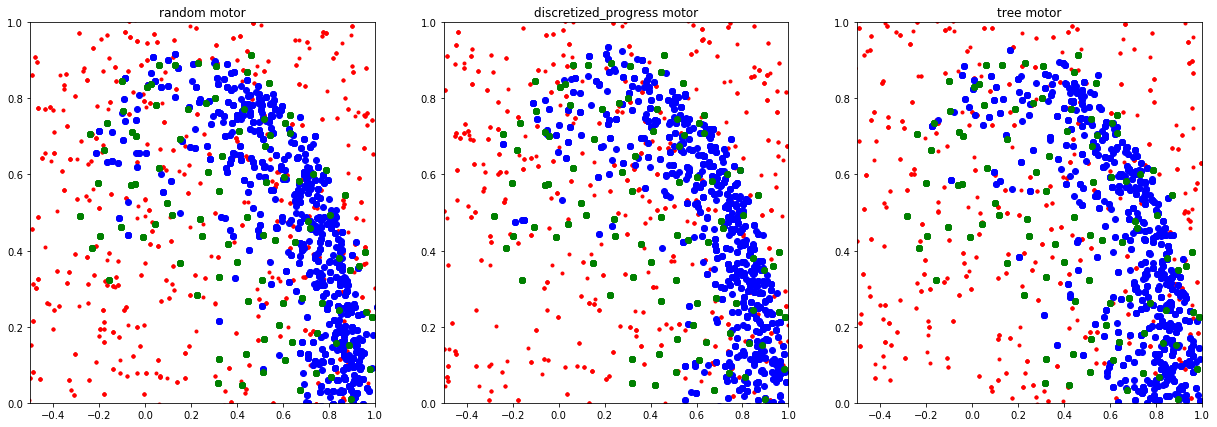

In [10]:
# animations does't work with inline plotting, hence:
%pylab 
rcParams['figure.figsize'] = (21.0, 7.0)
#ion()

#mng = get_current_fig_manager()
#mng.resize(*mng.window.maxsize())
last_t = 0
for t in linspace(100, xps.logs[0].eval_at[-1], 5):
    t = int(t)
    for i, (config, log) in enumerate(zip(xps.settings, xps.logs)):
        ax = subplot(1, 3, i+1)
        log.scatter_plot(ax, (('choice', [0, 1]),), t=range(t), marker='.', color='red')
        log.scatter_plot(ax, (('sensori', [0, 1]),), t=range(t), color='blue')
        log.scatter_plot(ax, (('testcases', [0, 1]),), color='green')
        title(config.interest_model + ' ' + config.babbling_mode)
    draw()
    last_t = t

Color code is the following: 

-RED: chosen goals, 

-BLUE: reached hand position, 

-GREEN: points where the competence is tested.

We observe that, whereas the *random* strategy sample points in the entire sensory space, the *Tree* interest model (right panel) behaves smarter. By choosing goals maximizing the learning progress, this strategy focuses more on the reachable aera (reached points are more uniformly distributed in the reachable area), and favors regions which were not explored before. This exploration is therefore an *active* strategy, where goals are chosen autonomously and adaptively in order to improve the quality of the sensorimotor model.

Explauto also allows plotting heat maps by using the density_plot method. The fancy animation below shows reached hand positions by white dots as well as chosen goals on a slicing time window using a heat map (here again, if you are on ipython.notebook.com you should only see the final image of the animation).

Populating the interactive namespace from numpy and matplotlib


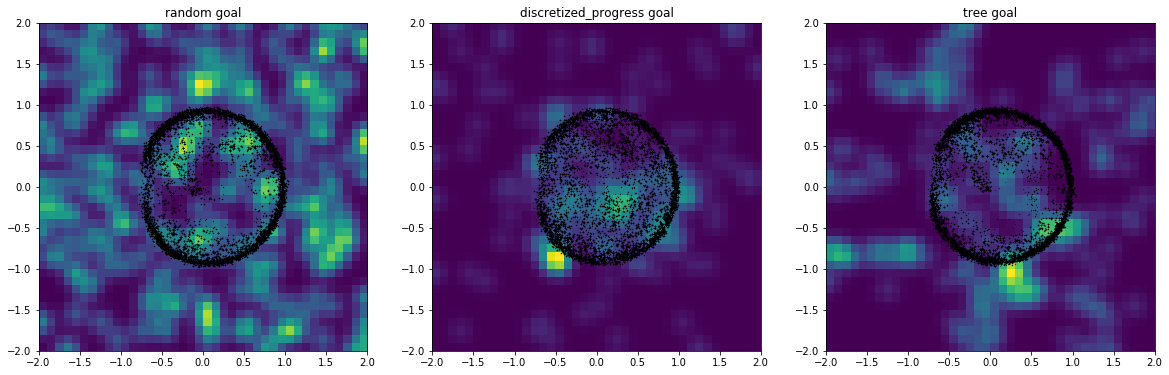

In [11]:
%pylab inline
rcParams['figure.figsize'] = (20.0, 16.0)
clf()
last_t = 0
#mng = get_current_fig_manager()
#mng.resize(*mng.window.maxsize())
for t in linspace(100, xps.logs[0].eval_at[-1], 20):
    t = int(t)
    for i, (config, log) in enumerate(zip(xps.settings, xps.logs)):
        ax = subplot(1, 3, i+1)
        log.scatter_plot(ax, (('sensori', [0, 1]),), range(0, t), marker='.', markersize=0.3, color = 'black')
        log.density_plot(ax, (('choice', [0, 1]),), range(last_t, t), width_x=1, width_y=1)
        title(config.interest_model + ' ' + config.babbling_mode)
    draw()
    last_t = t

After the experiment, we can re-construct the Tree interest model to plot it as it was at the end of the experiment:

Populating the interactive namespace from numpy and matplotlib


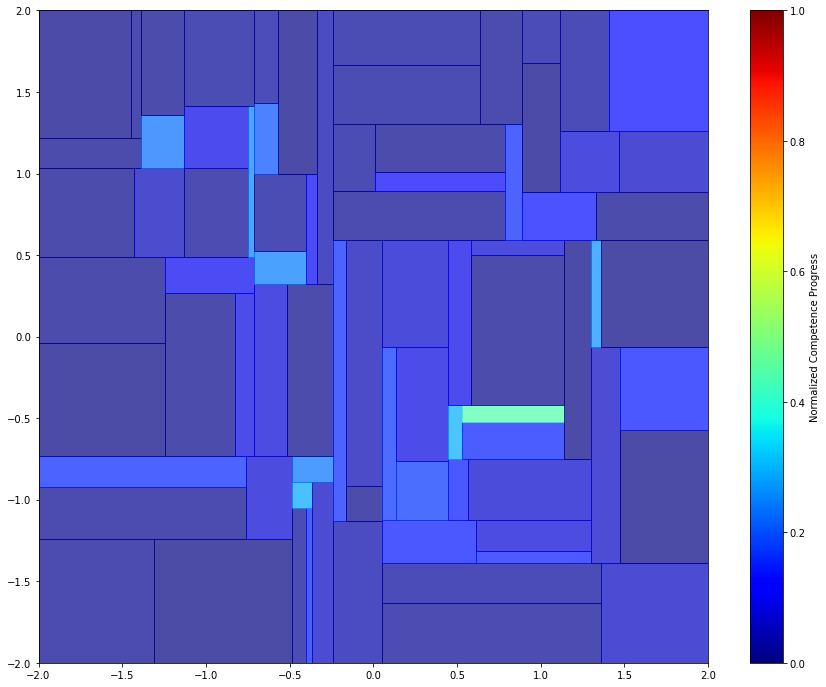

In [12]:
%pylab inline
rcParams['figure.figsize'] = (15.0, 12.0)
ax = axes()

from explauto.interest_model.tree import InterestTree, interest_models

# We pick goals and reached points
data_g = array(xps.logs[2].logs['choice']) # goals
data_s = array(xps.logs[2].logs['sensori']) # reached
n = len(data_g)

xy = zeros((xps.logs[2].conf.ndims,))
ms = zeros((xps.logs[2].conf.ndims,))

# Exploratory dimensions
expl_dims = xps.logs[2].conf.s_dims

# We create an empty interest tree
interest_tree = InterestTree(xps.logs[2].conf, xps.logs[2].conf.s_dims, **interest_models['tree'][1]['default'])

# We add points one by one
for i in range(n):
    xy[expl_dims] = data_g[i]
    ms[expl_dims] = data_s[i]
    interest_tree.update(xy, ms)
    
# We plot the tree representation
interest_tree.tree.plot(ax, True, True, True, interest_tree.progress(), 20)

# Plot stuff
plt.xlim((interest_tree.tree.bounds_x[0, 0], interest_tree.tree.bounds_x[1, 0]))
plt.ylim((interest_tree.tree.bounds_x[0, 1], interest_tree.tree.bounds_x[1, 1]))
import matplotlib.colorbar as cbar
cax, _ = cbar.make_axes(ax) 
cb = cbar.ColorbarBase(cax, cmap=plt.cm.jet) 
cb.set_label('Normalized Competence Progress')

The color code represents the competence progress in the region, computed as the absolute derivative of the competence on the points in the region. 
Progress is normalized so that the maximum progress is 1.